s&p500 stock prediction using linear regression

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the CSV file from the file location dataset
df = pd.read_csv('SPY.csv')

# printing the overview of the raw data set
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,439.250000,443.670013,439.100006,443.029999,436.918671,68441000
1,2023-08-24,444.690002,445.220001,436.859985,436.890015,430.863373,88517300
2,2023-08-25,438.679993,441.299988,435.000000,439.970001,433.900848,102325100
3,2023-08-28,442.239990,443.399994,439.970001,442.760010,436.652374,61595400
4,2023-08-29,442.649994,449.450012,442.459991,449.160004,442.964081,83081900


In [4]:
df.shape

(253, 7)

In [5]:
# checking for any null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Axes: >

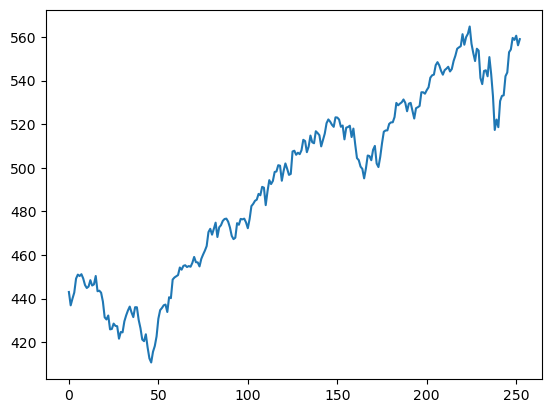

In [7]:
df['Close'].plot()

spliting data for testing

In [14]:
# spliting the dataset

x = df[['Open', 'High', 'Low', 'Volume']].values # indepedent variables
y = df['Close'].values # dependent variable

split the data into 80% train and 20% testing

In [16]:
from sklearn.model_selection import train_test_split
# splitting the data 80% train and 20% testing
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

training the model for linear prediction

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

# creating regression model
regressor = LinearRegression()

# fit linear regression model
model = regressor.fit(X_train, y_train)

# use model to make predictions
y_pred = regressor.predict(X_test)

prediction table of actual prices vs predicted values

In [18]:
# with the test prediction complete, the next step will better compare them
# with the actual output values for X_test by organizing them in a DataFrameformat:

predicted = regressor.predict(X_test)

dframe = pd.DataFrame(y_test, predicted)
dfr = pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':predicted})
print(dfr)


    Actual_Price  Predicted_Price
0     514.119995       514.667791
1     468.260010       470.385793
2     508.260010       508.997251
3     476.489990       475.324886
4     523.070007       524.113437
5     534.010010       535.775858
6     500.980011       502.724965
7     548.989990       550.165948
8     453.269989       453.588233
9     514.809998       512.892527
10    523.169983       521.248113
11    544.440002       545.871208
12    490.890015       491.560664
13    529.830017       529.132876
14    519.409973       520.672170
15    454.760010       455.493188
16    547.099976       547.118078
17    510.059998       508.763633
18    519.320007       515.789644
19    476.350006       473.824968
20    531.359985       531.511370
21    412.549988       413.210825
22    522.150024       526.455127
23    516.780029       514.635935
24    482.880005       484.017485
25    559.049988       561.639547
26    449.239990       450.324138
27    433.839996       434.594783
28    528.3900

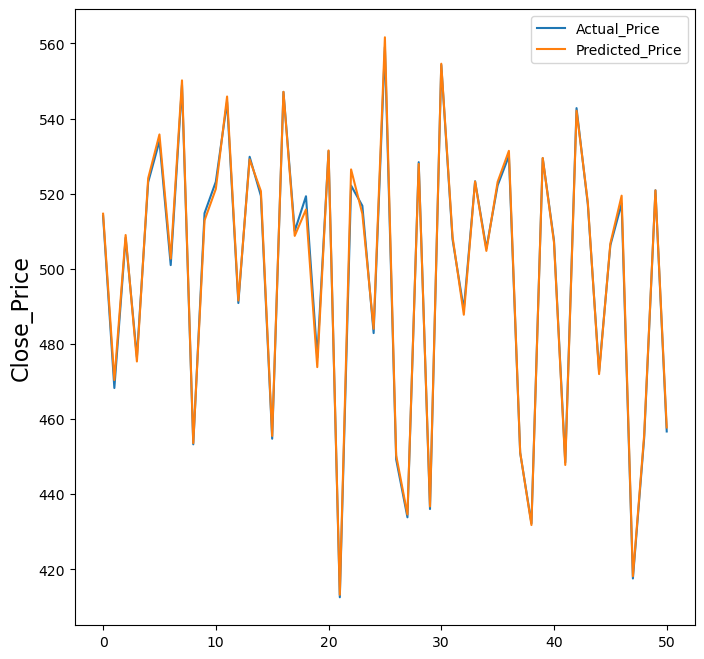

In [19]:
plt.figure(figsize=(8,8))
plt.ylabel('Close_Price', fontsize=16)
plt.plot(dfr)
plt.legend(['Actual_Price', 'Predicted_Price'])
plt.show()

graph of the first 15 values

<Axes: >

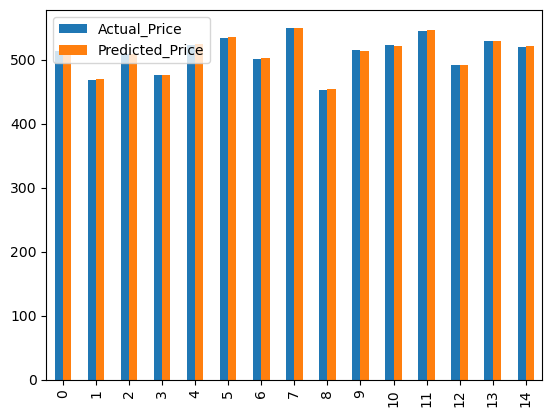

In [20]:
# graph of first 20 values
graph = dfr.head(15)
graph.plot(kind='bar')